# Predicting cab booking cancellation - Modeling
Capstone Project Two  Andy Clark
Introduction:
## 1. The Problem:
The business problem addressed here is to predict the 12 month oil cum for horizontal wells drilled in the Delaware Basin located in Texas and New Mexico.  The economics of drilling new wells relies heavliy on the well performance to pay for the signicant capital investment in drilling the well.  The 12 month oil cum is a good predictor of the estimated overall oil recovery over many years.  Predicting the 12 month cum cum oil can help optimize a companies drilling program by drilling the most economic wells.

## 2. The Data:
I downloaded the data from Enervus which has many features, many will not make sense to correlate to oil production.  The first step in my modelling will be to remove many features with no expected impact on oil production.

## 3. The questions of interest:
This data analysis and story-telling report is organized around the following questions of interest:
What features most accurately predict 12 month cum oil?  How are completion design and spacing affecting the 12 month cum oil.  Some areas of the basin are more prolific than others, how will the model account for the geology?  There are also PVT differences around the basin as well as local differences.  


## 4. Import the necessary libraries and the data:
To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. These are some data wrangling and exploratory analysis from the previous part. 

In [117]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('CompletionStudy_4_26_2022.csv')

C:\Users\asclark\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (49,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [120]:
df.head()

,API_UWI,Unformatted_API_UWI,API_UWI_12,Unformatted_API_UWI_12,API_UWI_14,Unformatted_API_UWI_14,WellID,CompletionID,WellPadID,WellPadDirection,ENVWellGrouping,CompletionNumber,WellName,Country,StateProvince,County,Lease,LeaseName,ENVOperator,RawOperator,InitialOperator,ENVTicker,ENV_Peer_Group,ENV_Stock_Exchange,ENVWellServiceProvider,ENVProdWellType,StateWellType,ENVWellType,ENVProducingMethod,ENVRegion,ENVBasin,ENVPlay,ENVSubPlay,ENVInterval,ENVIntervalSource,ENVSpacingAssumption,ENVWellStatus,OnConfidential,OffConfidentialDate,Trajectory,ENVWellboreType,Formation,FirstProdDate,Latitude,Longitude,Latitude_BH,Longitude_BH,TVD_FT,MD_FT,District,Field,Block,Abstract,Platform,Section,Township,Range,Section_Township_Range,Unit_Name,WellNumber,SurfaceLatitudeLongitudeSource,PlugDate,PlugbackMeasuredDepth_FT,PlugbackTrueVerticalDepth_FT,AvgBreakdownPressure_PSI,AvgClusterSpacingPerStage_FT,AvgClusterSpacing_FT,AvgFracGradient_PSIPerFT,AvgISIP_PSI,AvgMillTime_Min,AvgPortSleeveOpeningPressure_PSI,AvgShotsPerCluster,AvgShotsPerFt,AvgTreatmentPressure_PSI,AvgTreatmentRate_BBLPerMin,"ClustersPer1,000Ft",ClustersPerStage,"ShotsPer1,000Ft",ShotsPerStage,TotalShots,AvgFluidPerCluster_BBL,AvgFluidPerShot_BBL,AvgFluidPerStage_BBL,FracRigOnsiteDate,FracRigReleaseDate,AvgProppantPerCluster_LBS,AvgProppantPerShot_LBS,AvgProppantPerStage_LBS,StimulatedStages,TotalClusters,Vintage,FirstProdQuarter,FirstProdMonth,ENVElevationKB_FT,ENVElevationKBSource,ENVElevationGL_FT,ENVElevationGLSource,ElevationKB_FT,ElevationGL_FT,CoordinateSource,PermitApprovedDate,PermitSubmittedDate,SpudDate,DrillingEndDate,RigReleaseDate,CompletionDate,FirstDay,ENVCompInsertedDate,StateFileNumber,ENVFracJobType,ENVFluidType,CompletionTime_DAYS,CompletionDesign,PermitToSpud_DAYS,SpudToRigRelease_DAYS,SpudToCompletion_DAYS,SpudToSales_DAYS,SoakTime_DAYS,NumberOfStrings,UpperPerf_FT,LowerPerf_FT,PerfInterval_FT,LateralLength_FT,FracStages,AverageStageSpacing_FT,ENVProppantBrand,ProppantLoading_LBSPerGAL,ENVProppantType,ProppantIntensity_LBSPerFT,Proppant_LBS,TotalWaterPumped_GAL,WaterIntensity_GALPerFT,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,AcidVolume_BBL,Bottom_Hole_Temp_DEGF,Biocide_LBS,Breaker_LBS,Buffer_LBS,ClayControl_LBS,CrossLinker_LBS,FrictionReducer_LBS,GellingAgent_LBS,IronControl_LBS,ScaleInhibitor_LBS,Surfactant_LBS,Energizer_LBS,Diverter_LBS,TestDate,ChokeSize_64IN,TestRate_BOEPerDAY,TestRate_BOEPerDAYPer1000FT,TestRate_MCFEPerDAY,OilTestRate_BBLPerDAY,OilTestRate_BBLPerDAYPer1000FT,GasTestRate_MCFPerDAY,GasTestRate_MCFPerDAYPer1000FT,WaterTestRate_BBLPerDAY,WaterTestRate_BBLPerDAYPer1000Ft,WaterDepth,TestWHLiquids_PCT,CasingPressure_PSI,FlowingTubingPressure_PSI,ShutInPressure_PSI,OilProdPriorTest_BBL,OilTestMethodName,OilGravity_API,GasGravity_SG,First3MonthProd_BOE,First3MonthProd_BOEPer1000FT,First3MonthGas_MCF,First3MonthGas_MCFPer1000FT,First3MonthProd_MCFE,First3MonthProd_MCFEPer1000FT,First3MonthOil_BBL,First3MonthOil_BBLPer1000FT,First3MonthWater_BBL,First6MonthProd_BOE,First6MonthProd_BOEPer1000FT,First6MonthGas_MCF,First6MonthGas_MCFPer1000FT,First6MonthProd_MCFE,First6MonthProd_MCFEPer1000FT,First6MonthOil_BBL,First6MonthOil_BBLPer1000FT,First6MonthWater_BBL,First9MonthProd_BOE,First9MonthProd_BOEPer1000FT,First9MonthGas_MCF,First9MonthGas_MCFPer1000FT,First9MonthProd_MCFE,First9MonthProd_MCFEPer1000FT,First9MonthOil_BBL,First9MonthOil_BBLPer1000FT,First9MonthWater_BBL,First12MonthProd_BOE,First12MonthProd_BOEPer1000FT,First12MonthGas_MCF,First12MonthGas_MCFPer1000FT,First12MonthProd_MCFE,First12MonthProd_MCFEPer1000FT,First12MonthOil_BBL,First12MonthOil_BBLPer1000FT,First12MonthWater_BBL,First36MonthProd_BOE,First36MonthProd_BOEPer1000FT,First36MonthGas_MCF,First36MonthGas_MCFPer1000FT,First36MonthProd_MCFE,First36MonthProd_MCFEPer1000FT,First36MonthOil_BBL,First36MonthOil_BBLPer1000FT,First36MonthWater_BBL,First36MonthWaterProductionBBLPer1000Ft,PeakProductionDate,MonthsToPeakProduction,PeakProd_BOE,PeakProd_BOEPer1000FT,PeakGas_MCF,PeakGas_

In [121]:
df.shape

(14909, 364)

In [122]:
my_list = df.columns.values.tolist()
my_list

['API_UWI',
 'Unformatted_API_UWI',
 'API_UWI_12',
 'Unformatted_API_UWI_12',
 'API_UWI_14',
 'Unformatted_API_UWI_14',
 'WellID',
 'CompletionID',
 'WellPadID',
 'WellPadDirection',
 'ENVWellGrouping',
 'CompletionNumber',
 'WellName',
 'Country',
 'StateProvince',
 'County',
 'Lease',
 'LeaseName',
 'ENVOperator',
 'RawOperator',
 'InitialOperator',
 'ENVTicker',
 'ENV_Peer_Group',
 'ENV_Stock_Exchange',
 'ENVWellServiceProvider',
 'ENVProdWellType',
 'StateWellType',
 'ENVWellType',
 'ENVProducingMethod',
 'ENVRegion',
 'ENVBasin',
 'ENVPlay',
 'ENVSubPlay',
 'ENVInterval',
 'ENVIntervalSource',
 'ENVSpacingAssumption',
 'ENVWellStatus',
 'OnConfidential',
 'OffConfidentialDate',
 'Trajectory',
 'ENVWellboreType',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'Latitude_BH',
 'Longitude_BH',
 'TVD_FT',
 'MD_FT',
 'District',
 'Field',
 'Block',
 'Abstract',
 'Platform',
 'Section',
 'Township',
 'Range',
 'Section_Township_Range',
 'Unit_Name',
 'WellNumber',
 'SurfaceL

In [123]:
drop_cols = ['API_UWI',
 'Unformatted_API_UWI',
 'API_UWI_12',
 'Unformatted_API_UWI_12',
 'API_UWI_14','WellID',
 'CompletionID',
 'WellPadID',
 'WellPadDirection',
 'ENVWellGrouping',
 'CompletionNumber','Country',
 'StateProvince',
 'County','ENVTicker',
 'ENV_Peer_Group',
 'ENV_Stock_Exchange','ENVProdWellType',
 'StateWellType',
 'ENVWellType',
 'ENVProducingMethod',
 'ENVRegion',
 'ENVBasin',
 'ENVPlay',
 'ENVSubPlay','ENVIntervalSource','ENVWellStatus',
 'OnConfidential',
 'OffConfidentialDate',
 'Trajectory',
 'ENVWellboreType','District',
 'Field',
 'Block',
 'Abstract',
 'Platform',
 'Section',
 'Township',
 'Range',
 'Section_Township_Range',
 'Unit_Name',
 'WellNumber','SurfaceLatitudeLongitudeSource',
 'PlugDate',
 'PlugbackMeasuredDepth_FT',
 'PlugbackTrueVerticalDepth_FT',
 'AvgBreakdownPressure_PSI',
 'AvgClusterSpacingPerStage_FT',
 'AvgClusterSpacing_FT',
 'AvgFracGradient_PSIPerFT',
 'AvgISIP_PSI',
 'AvgMillTime_Min',
 'AvgPortSleeveOpeningPressure_PSI',
 'AvgShotsPerCluster',
 'AvgShotsPerFt',
 'AvgTreatmentPressure_PSI',
 'AvgTreatmentRate_BBLPerMin',
 'ClustersPer1,000Ft',
 'ClustersPerStage',
 'ShotsPer1,000Ft',
 'ShotsPerStage',
 'TotalShots',
 'AvgFluidPerCluster_BBL',
 'AvgFluidPerShot_BBL',
 'AvgFluidPerStage_BBL',
 'FracRigOnsiteDate',
 'FracRigReleaseDate','FirstProdQuarter',
 'FirstProdMonth',
 'ENVElevationKB_FT',
 'ENVElevationKBSource',
 'ENVElevationGL_FT',
 'ENVElevationGLSource',
 'ElevationKB_FT',
 'ElevationGL_FT',
 'CoordinateSource',
 'PermitApprovedDate',
 'PermitSubmittedDate',
 'SpudDate',
 'DrillingEndDate',
 'RigReleaseDate',
 'CompletionDate',
 'FirstDay',
 'ENVCompInsertedDate',
 'StateFileNumber','PermitToSpud_DAYS',
 'SpudToRigRelease_DAYS',
 'SpudToCompletion_DAYS',
 'SpudToSales_DAYS', 'NumberOfStrings',
 'UpperPerf_FT',
 'LowerPerf_FT',
 'PerfInterval_FT','AcidVolume_BBL',
 'Bottom_Hole_Temp_DEGF',
 'Biocide_LBS',
 'Breaker_LBS',
 'Buffer_LBS',
 'ClayControl_LBS',
 'CrossLinker_LBS',
 'FrictionReducer_LBS',
 'GellingAgent_LBS',
 'IronControl_LBS',
 'ScaleInhibitor_LBS',
 'Surfactant_LBS',
 'Energizer_LBS',
 'Diverter_LBS',
 'TestDate',
 'ChokeSize_64IN',
 'TestRate_BOEPerDAY',
 'TestRate_BOEPerDAYPer1000FT',
 'TestRate_MCFEPerDAY',
 'OilTestRate_BBLPerDAY',
 'OilTestRate_BBLPerDAYPer1000FT',
 'GasTestRate_MCFPerDAY',
 'GasTestRate_MCFPerDAYPer1000FT',
 'WaterTestRate_BBLPerDAY',
 'WaterTestRate_BBLPerDAYPer1000Ft',
 'WaterDepth',
 'TestWHLiquids_PCT',
 'CasingPressure_PSI',
 'FlowingTubingPressure_PSI',
 'ShutInPressure_PSI',
 'OilProdPriorTest_BBL',
 'OilTestMethodName',
 'OilGravity_API',
 'GasGravity_SG',
 'First3MonthProd_BOE',
 'First3MonthProd_BOEPer1000FT',
 'First3MonthGas_MCF',
 'First3MonthGas_MCFPer1000FT',
 'First3MonthProd_MCFE',
 'First3MonthProd_MCFEPer1000FT',
 'First3MonthOil_BBL',
 'First3MonthOil_BBLPer1000FT',
 'First3MonthWater_BBL',
 'First6MonthProd_BOE',
 'First6MonthProd_BOEPer1000FT',
 'First6MonthGas_MCF',
 'First6MonthGas_MCFPer1000FT',
 'First6MonthProd_MCFE',
 'First6MonthProd_MCFEPer1000FT',
 'First6MonthOil_BBL',
 'First6MonthOil_BBLPer1000FT',
 'First6MonthWater_BBL',
 'First9MonthProd_BOE',
 'First9MonthProd_BOEPer1000FT',
 'First9MonthGas_MCF',
 'First9MonthGas_MCFPer1000FT',
 'First9MonthProd_MCFE',
 'First9MonthProd_MCFEPer1000FT',
 'First9MonthOil_BBL',
 'First9MonthOil_BBLPer1000FT',
 'First9MonthWater_BBL','First36MonthProd_BOE',
 'First36MonthProd_BOEPer1000FT',
 'First36MonthGas_MCF',
 'First36MonthGas_MCFPer1000FT',
 'First36MonthProd_MCFE',
 'First36MonthProd_MCFEPer1000FT',
 'First36MonthOil_BBL',
 'First36MonthOil_BBLPer1000FT',
 'First36MonthWater_BBL',
 'First36MonthWaterProductionBBLPer1000Ft',
 'PeakProductionDate',
 'MonthsToPeakProduction',
 'PeakProd_BOE',
 'PeakProd_BOEPer1000FT',
 'PeakGas_MCF',
 'PeakGas_MCFPer1000FT',
 'PeakProd_MCFE',
 'PeakProd_MCFEPer1000FT',
 'PeakOil_BBL',
 'PeakOil_BBLPer1000FT',
 'PeakWater_BBL',
 'CumProd_BOE',
 'CumProd_BOEPer1000FT',
 'CumGas_MCF',
 'CumGas_MCFPer1000FT',
 'CumProd_MCFE',
 'CumProd_MCFEPer1000FT',
 'CumOil_BBL',
 'CumOil_BBLPer1000FT',
 'CumWater_BBL',
 'TotalProducingMonths',
 'LastProducingMonth',
 'LastMonthLiquidsProduction_BBL',
 'LastMonthGasProduction_MCF',
 'LastMonthWaterProduction_BBL',
 'Last12MonthBOEProduction',
 'Last12MonthGasProduction_MCF',
 'Last12MonthOilProduction_BBL',
 'Last12MonthWaterProduction_BBL','CumulativeSOR',
 'Last3MonthISOR',
 'ToeAngle_DEG',
 'AzimuthFromGridNorth_DEG','ENVOilGatherer',
 'ENVGasGatherer',
 'ENVOilGatheringSystem',
 'ENVGasGatheringSystem','SpudDateSource',
 'TestRate_MCFEPerDAYPer1000FT',
 'FirstProdYear']

In [124]:
df.drop(labels=drop_cols, axis=1, inplace=True)

In [125]:
df.shape

(14909, 160)

In [126]:
my_list = df.columns.values.tolist()
my_list

['Unformatted_API_UWI_14',
 'WellName',
 'Lease',
 'LeaseName',
 'ENVOperator',
 'RawOperator',
 'InitialOperator',
 'ENVWellServiceProvider',
 'ENVInterval',
 'ENVSpacingAssumption',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'Latitude_BH',
 'Longitude_BH',
 'TVD_FT',
 'MD_FT',
 'AvgProppantPerCluster_LBS',
 'AvgProppantPerShot_LBS',
 'AvgProppantPerStage_LBS',
 'StimulatedStages',
 'TotalClusters',
 'Vintage',
 'ENVFracJobType',
 'ENVFluidType',
 'CompletionTime_DAYS',
 'CompletionDesign',
 'SoakTime_DAYS',
 'LateralLength_FT',
 'FracStages',
 'AverageStageSpacing_FT',
 'ENVProppantBrand',
 'ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT',
 'Proppant_LBS',
 'TotalWaterPumped_GAL',
 'WaterIntensity_GALPerFT',
 'TotalFluidPumped_BBL',
 'FluidIntensity_BBLPerFT',
 'First12MonthProd_BOE',
 'First12MonthProd_BOEPer1000FT',
 'First12MonthGas_MCF',
 'First12MonthGas_MCFPer1000FT',
 'First12MonthProd_MCFE',
 'First12MonthProd_MCFEPer1000FT',
 'F

In [127]:
drop_cols = [ 'Lease','RawOperator','InitialOperator','Latitude_BH','Longitude_BH']
df.drop(labels=drop_cols, axis=1, inplace=True)
df.shape

(14909, 155)

In [128]:
my_list = df.columns.values.tolist()
my_list

['Unformatted_API_UWI_14',
 'WellName',
 'LeaseName',
 'ENVOperator',
 'ENVWellServiceProvider',
 'ENVInterval',
 'ENVSpacingAssumption',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'TVD_FT',
 'MD_FT',
 'AvgProppantPerCluster_LBS',
 'AvgProppantPerShot_LBS',
 'AvgProppantPerStage_LBS',
 'StimulatedStages',
 'TotalClusters',
 'Vintage',
 'ENVFracJobType',
 'ENVFluidType',
 'CompletionTime_DAYS',
 'CompletionDesign',
 'SoakTime_DAYS',
 'LateralLength_FT',
 'FracStages',
 'AverageStageSpacing_FT',
 'ENVProppantBrand',
 'ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT',
 'Proppant_LBS',
 'TotalWaterPumped_GAL',
 'WaterIntensity_GALPerFT',
 'TotalFluidPumped_BBL',
 'FluidIntensity_BBLPerFT',
 'First12MonthProd_BOE',
 'First12MonthProd_BOEPer1000FT',
 'First12MonthGas_MCF',
 'First12MonthGas_MCFPer1000FT',
 'First12MonthProd_MCFE',
 'First12MonthProd_MCFEPer1000FT',
 'First12MonthOil_BBL',
 'First12MonthOil_BBLPer1000FT',
 'First12MonthWater_BBL',

In [129]:
# Filter all rows with 0 12 month cum oil
df.drop(df[df['First12MonthOil_BBL'] < 5].index, inplace = True)

In [130]:
df.shape

(14852, 155)

In [131]:
# Filter all rows with low lateral length
df.drop(df[df['LateralLength_FT'] < 4500].index, inplace = True)

In [132]:
# Filter all rows with low sand and water
df.drop(df[df['ProppantIntensity_LBSPerFT'] < 1000].index, inplace = True)
df.drop(df[df['WaterIntensity_GALPerFT'] < 420].index, inplace = True)

In [133]:
# Filter all rows with too high sand and water
df.drop(df[df['ProppantIntensity_LBSPerFT'] > 5000].index, inplace = True)
df.drop(df[df['WaterIntensity_GALPerFT'] > 4200].index, inplace = True)

In [134]:
# Filter all rows with out ENV Target
df.ENVInterval.unique()

array(['WOLFCAMP A LOWER', 'DELAWARE VERTICAL', 'WOLFCAMP B LOWER',
       'WOLFCAMP B UPPER', '2ND BONE SPRING', 'WOLFCAMP XY',
       'WOLFCAMP A UPPER', '3RD BONE SPRING SAND', '2ND BONE SPRING SAND',
       '3RD BONE SPRING', 'WOLFCAMP C', 'LOWER AVALON', 'MIDDLE AVALON',
       nan, 'LOWER PENNSYLVANIAN AND MISSISSIPPIAN', 'WOODFORD AND BELOW',
       'WOLFCAMP D', 'UPPER AVALON', '1ST BONE SPRING',
       'ABOVE UPPER AVALON'], dtype=object)

In [135]:
interval_to_drop =['DELAWARE VERTICAL', 'LOWER AVALON', 'MIDDLE AVALON',
        'LOWER PENNSYLVANIAN AND MISSISSIPPIAN', 'WOODFORD AND BELOW',
       'WOLFCAMP D', 'UPPER AVALON', 'nan']

In [136]:
df = df[~df['ENVInterval'].isin(interval_to_drop)]

## 5. Select the feature columns:
The data set has been reduced for unnecessary columns, now pick the feature columns, further reduce the data set that should be most impactful to 12 month cum oil production. Also remove some rows that do not have an entry.

In [137]:
df.columns

Index(['Unformatted_API_UWI_14', 'WellName', 'LeaseName', 'ENVOperator',
       'ENVWellServiceProvider', 'ENVInterval', 'ENVSpacingAssumption',
       'Formation', 'FirstProdDate', 'Latitude',
       ...
       'EnvVerticalSpacingClassSameZone',
       'VerticalParentChildAtDrillTimeAnyZone',
       'EnvVerticalSpacingClassAtDrillTimeAnyZone',
       'VerticalParentChildAnyZone', 'EnvVerticalSpacingClassAnyZone',
       'VerticalParentChildAtDrillTime100dVZone',
       'EnvVerticalSpacingClassAtDrillTime100dVZone',
       'VerticalParentChild100dVZone', 'EnvVerticalSpacingClass100dVZone',
       'Proppant_per_stage'],
      dtype='object', length=155)

In [138]:
my_list = df.columns.values.tolist()
my_list

['Unformatted_API_UWI_14',
 'WellName',
 'LeaseName',
 'ENVOperator',
 'ENVWellServiceProvider',
 'ENVInterval',
 'ENVSpacingAssumption',
 'Formation',
 'FirstProdDate',
 'Latitude',
 'Longitude',
 'TVD_FT',
 'MD_FT',
 'AvgProppantPerCluster_LBS',
 'AvgProppantPerShot_LBS',
 'AvgProppantPerStage_LBS',
 'StimulatedStages',
 'TotalClusters',
 'Vintage',
 'ENVFracJobType',
 'ENVFluidType',
 'CompletionTime_DAYS',
 'CompletionDesign',
 'SoakTime_DAYS',
 'LateralLength_FT',
 'FracStages',
 'AverageStageSpacing_FT',
 'ENVProppantBrand',
 'ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT',
 'Proppant_LBS',
 'TotalWaterPumped_GAL',
 'WaterIntensity_GALPerFT',
 'TotalFluidPumped_BBL',
 'FluidIntensity_BBLPerFT',
 'First12MonthProd_BOE',
 'First12MonthProd_BOEPer1000FT',
 'First12MonthGas_MCF',
 'First12MonthGas_MCFPer1000FT',
 'First12MonthProd_MCFE',
 'First12MonthProd_MCFEPer1000FT',
 'First12MonthOil_BBL',
 'First12MonthOil_BBLPer1000FT',
 'First12MonthWater_BBL',

In [139]:
features_y = ['ENVOperator',
 'ENVWellServiceProvider',
 'ENVInterval','Latitude',
 'Longitude',
 'TVD_FT', 'ENVFracJobType',
 'ENVFluidType', 'LateralLength_FT',
 'FracStages','ProppantLoading_LBSPerGAL',
 'ENVProppantType',
 'ProppantIntensity_LBSPerFT','FluidIntensity_BBLPerFT','First12MonthOil_BBL','WellsPerSectionAnyZone',
 'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
 'Closest3DDistAtDrillTimeSameZone_FT','Avg3DDistAtDrillTimeAnyZone_FT',
 'Avg3DDistAtDrillTimeSameZone_FT','ParentWellCountAtDrillTimeAnyZone',
 'ParentWellCountAtDrillTimeSameZone']

In [140]:
df = df[features_y]

In [141]:
df.shape

(10354, 23)

In [142]:
df=df.dropna(subset=['First12MonthOil_BBL', 'LateralLength_FT','ProppantIntensity_LBSPerFT','FluidIntensity_BBLPerFT','WellsPerSectionAnyZone', 'WellsPerSectionSameZone'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7177 entries, 1 to 14908
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ENVOperator                          7177 non-null   object 
 1   ENVWellServiceProvider               7176 non-null   object 
 2   ENVInterval                          7173 non-null   object 
 3   Latitude                             7177 non-null   float64
 4   Longitude                            7177 non-null   float64
 5   TVD_FT                               7177 non-null   float64
 6   ENVFracJobType                       6841 non-null   object 
 7   ENVFluidType                         6833 non-null   object 
 8   LateralLength_FT                     7177 non-null   float64
 9   FracStages                           1812 non-null   float64
 10  ProppantLoading_LBSPerGAL            7177 non-null   float64
 11  ENVProppantType              

In [169]:
features = ['ENVInterval','Latitude',
 'Longitude',
 'TVD_FT', 'LateralLength_FT','ProppantLoading_LBSPerGAL',
 'ProppantIntensity_LBSPerFT','FluidIntensity_BBLPerFT','WellsPerSectionAnyZone',
 'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
 'Closest3DDistAtDrillTimeSameZone_FT','Avg3DDistAtDrillTimeAnyZone_FT',
 'Avg3DDistAtDrillTimeSameZone_FT','ParentWellCountAtDrillTimeAnyZone',
 'ParentWellCountAtDrillTimeSameZone']

In [170]:
df[features]

,ENVInterval,Latitude,Longitude,TVD_FT,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellsPerSectionAnyZone,WellsPerSectionSameZone,Closest3DDistAtDrillTimeAnyZone_FT,Closest3DDistAtDrillTimeSameZone_FT,Avg3DDistAtDrillTimeAnyZone_FT,Avg3DDistAtDrillTimeSameZone_FT,ParentWellCountAtDrillTimeAnyZone,ParentWellCountAtDrillTimeSameZone
1,WOLFCAMP A LOWER,31.781484,-104.135137,9053.08,7616.0,1.007404,1657.5867,39.176280,1.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0
6,WOLFCAMP B LOWER,31.894857,-104.127815,9946.45,10208.0,1.143460,2252.8445,46.909500,4.0,1.0,703.979475,2600.000000,703.979475,2600.000000,0.0,0.0
7,WOLFCAMP B UPPER,31.605297,-104.034378,9810.81,5788.0,1.376621,1095.4766,18.946959,2.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0
8,WOLFCAMP A LOWER,31.782745,-103.893958,10373.73,4596.0,1.089411,1308.0999,28.589070,4.0,3.0,439.297497,645.799182,439.297497,645.799182,0.0,0.0
9,WOLFCAMP A LOWER,31.669476,-103.706177,10816.88,9419.0,1.117987,1804.3873,38.427647,6.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14894,WOLFCAMP B LOWER,31.550578,-103.753705,11228.50,9443.0,1.211387,2554.5007,50.208090,11.0,1.0,611.114872,2600.000000,661.739060,2600.000000,2.0,0.0
14899,2ND BONE SPRING SAND,31.969879,-103.872826,9275.01,10189.0,1.407919,2510.3274,42.452500,3.0,1.0,892.200448,2600.000000,892.200448,2600.000000,2.0,0.0
14900,2ND BONE SPRING SAND,31.103531,-103.047813,9224.07,10410.0,1.019477,2492.0764,58.201546,6.0,1.0,1246.876694,2600.000000,1312.918217,2600.000000,2.0,0.0
14904,WOLFCAMP A LOWER,31.445014,-103.562801,10487.98,9330.0,0.855571,1966.4954,54.725260,3.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0


In [148]:
df['Closest3DDistAtDrillTimeAnyZone_FT'].fillna(2600, inplace=True)
df['Closest3DDistAtDrillTimeSameZone_FT'].fillna(2600, inplace=True)
df['Avg3DDistAtDrillTimeAnyZone_FT'].fillna(2600, inplace=True)
df['Avg3DDistAtDrillTimeSameZone_FT'].fillna(2600, inplace=True)

# Plot up histograms of features

array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'TVD_FT'}>,
        <AxesSubplot:title={'center':'LateralLength_FT'}>],
       [<AxesSubplot:title={'center':'FracStages'}>,
        <AxesSubplot:title={'center':'ProppantLoading_LBSPerGAL'}>,
        <AxesSubplot:title={'center':'ProppantIntensity_LBSPerFT'}>,
        <AxesSubplot:title={'center':'FluidIntensity_BBLPerFT'}>],
       [<AxesSubplot:title={'center':'First12MonthOil_BBL'}>,
        <AxesSubplot:title={'center':'WellsPerSectionAnyZone'}>,
        <AxesSubplot:title={'center':'WellsPerSectionSameZone'}>,
        <AxesSubplot:title={'center':'Closest3DDistAtDrillTimeAnyZone_FT'}>],
       [<AxesSubplot:title={'center':'Closest3DDistAtDrillTimeSameZone_FT'}>,
        <AxesSubplot:title={'center':'Avg3DDistAtDrillTimeAnyZone_FT'}>,
        <AxesSubplot:title={'center':'Avg3DDistAtDrillTimeSameZone_FT'}>,
        <AxesSubplot:title={'center

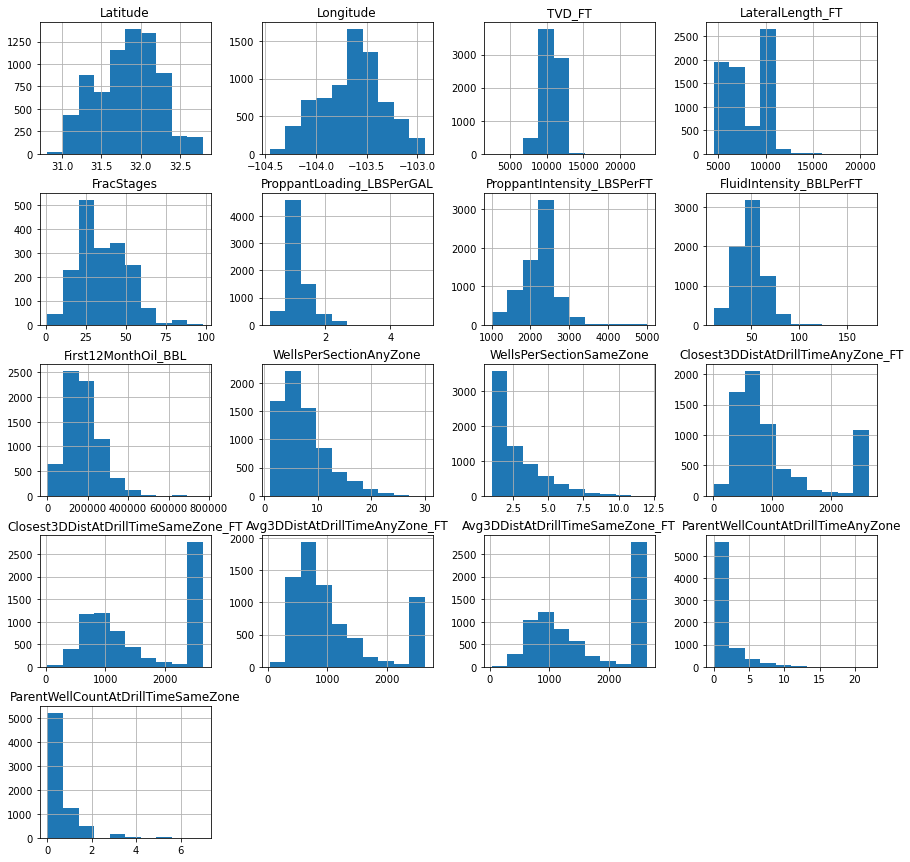

In [199]:
df.hist(figsize = (15,15))

Correlation between various features


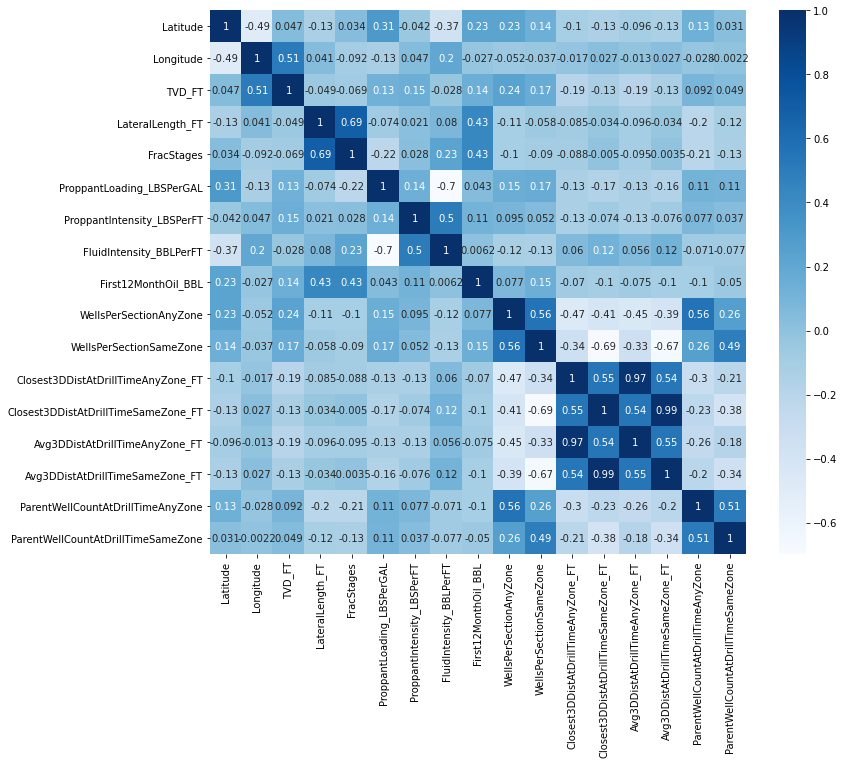

In [198]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

In [180]:
df_dummys = pd.get_dummies(df[features], drop_first=True)
df_dummys

,Latitude,Longitude,TVD_FT,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellsPerSectionAnyZone,WellsPerSectionSameZone,Closest3DDistAtDrillTimeAnyZone_FT,Closest3DDistAtDrillTimeSameZone_FT,Avg3DDistAtDrillTimeAnyZone_FT,Avg3DDistAtDrillTimeSameZone_FT,ParentWellCountAtDrillTimeAnyZone,ParentWellCountAtDrillTimeSameZone,ENVInterval_2ND BONE SPRING,ENVInterval_2ND BONE SPRING SAND,ENVInterval_3RD BONE SPRING,ENVInterval_3RD BONE SPRING SAND,ENVInterval_ABOVE UPPER AVALON,ENVInterval_WOLFCAMP A LOWER,ENVInterval_WOLFCAMP A UPPER,ENVInterval_WOLFCAMP B LOWER,ENVInterval_WOLFCAMP B UPPER,ENVInterval_WOLFCAMP C,ENVInterval_WOLFCAMP XY
1,31.781484,-104.135137,9053.08,7616.0,1.007404,1657.5867,39.176280,1.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0
6,31.894857,-104.127815,9946.45,10208.0,1.143460,2252.8445,46.909500,4.0,1.0,703.979475,2600.000000,703.979475,2600.000000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
7,31.605297,-104.034378,9810.81,5788.0,1.376621,1095.4766,18.946959,2.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0
8,31.782745,-103.893958,10373.73,4596.0,1.089411,1308.0999,28.589070,4.0,3.0,439.297497,645.799182,439.297497,645.799182,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0
9,31.669476,-103.706177,10816.88,9419.0,1.117987,1804.3873,38.427647,6.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14894,31.550578,-103.753705,11228.50,9443.0,1.211387,2554.5007,50.208090,11.0,1.0,611.114872,2600.000000,661.739060,2600.000000,2.0,0.0,0,0,0,0,0,0,0,1,0,0,0
14899,31.969879,-103.872826,9275.01,10189.0,1.407919,2510.3274,42.452500,3.0,1.0,892.200448,2600.000000,892.200448,2600.000000,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0
14900,31.103531,-103.047813,9224.07,10410.0,1.019477,2492.0764,58.201546,6.0,1.0,1246.876694,2600.000000,1312.918217,2600.000000,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0
14904,31.445014,-103.562801,10487.98,9330.0,0.855571,1966.4954,54.725260,3.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0


In [181]:
df_dummys.columns

Index(['Latitude', 'Longitude', 'TVD_FT', 'LateralLength_FT',
       'ProppantLoading_LBSPerGAL', 'ProppantIntensity_LBSPerFT',
       'FluidIntensity_BBLPerFT', 'WellsPerSectionAnyZone',
       'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
       'Closest3DDistAtDrillTimeSameZone_FT', 'Avg3DDistAtDrillTimeAnyZone_FT',
       'Avg3DDistAtDrillTimeSameZone_FT', 'ParentWellCountAtDrillTimeAnyZone',
       'ParentWellCountAtDrillTimeSameZone', 'ENVInterval_2ND BONE SPRING',
       'ENVInterval_2ND BONE SPRING SAND', 'ENVInterval_3RD BONE SPRING',
       'ENVInterval_3RD BONE SPRING SAND', 'ENVInterval_ABOVE UPPER AVALON',
       'ENVInterval_WOLFCAMP A LOWER', 'ENVInterval_WOLFCAMP A UPPER',
       'ENVInterval_WOLFCAMP B LOWER', 'ENVInterval_WOLFCAMP B UPPER',
       'ENVInterval_WOLFCAMP C', 'ENVInterval_WOLFCAMP XY'],
      dtype='object')

In [183]:
features = ['Latitude', 'Longitude', 'TVD_FT', 'LateralLength_FT',
       'ProppantLoading_LBSPerGAL', 'ProppantIntensity_LBSPerFT',
       'FluidIntensity_BBLPerFT', 'WellsPerSectionAnyZone',
       'WellsPerSectionSameZone', 'Closest3DDistAtDrillTimeAnyZone_FT',
       'Closest3DDistAtDrillTimeSameZone_FT', 'Avg3DDistAtDrillTimeAnyZone_FT',
       'Avg3DDistAtDrillTimeSameZone_FT', 'ParentWellCountAtDrillTimeAnyZone',
       'ParentWellCountAtDrillTimeSameZone', 'ENVInterval_2ND BONE SPRING',
       'ENVInterval_2ND BONE SPRING SAND', 'ENVInterval_3RD BONE SPRING',
       'ENVInterval_3RD BONE SPRING SAND', 'ENVInterval_ABOVE UPPER AVALON',
       'ENVInterval_WOLFCAMP A LOWER', 'ENVInterval_WOLFCAMP A UPPER',
       'ENVInterval_WOLFCAMP B LOWER', 'ENVInterval_WOLFCAMP B UPPER',
       'ENVInterval_WOLFCAMP C', 'ENVInterval_WOLFCAMP XY']

In [184]:
# Now create the features X and y set
y = df.First12MonthOil_BBL
X = df_dummys[features]

In [185]:
y

1        238979.00
6        124593.24
7         22234.00
8        103996.00
9        405154.20
           ...    
14894    215886.00
14899    384439.00
14900    151880.00
14904    283910.00
14908    265725.00
Name: First12MonthOil_BBL, Length: 7177, dtype: float64

In [186]:
X

,Latitude,Longitude,TVD_FT,LateralLength_FT,ProppantLoading_LBSPerGAL,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellsPerSectionAnyZone,WellsPerSectionSameZone,Closest3DDistAtDrillTimeAnyZone_FT,Closest3DDistAtDrillTimeSameZone_FT,Avg3DDistAtDrillTimeAnyZone_FT,Avg3DDistAtDrillTimeSameZone_FT,ParentWellCountAtDrillTimeAnyZone,ParentWellCountAtDrillTimeSameZone,ENVInterval_2ND BONE SPRING,ENVInterval_2ND BONE SPRING SAND,ENVInterval_3RD BONE SPRING,ENVInterval_3RD BONE SPRING SAND,ENVInterval_ABOVE UPPER AVALON,ENVInterval_WOLFCAMP A LOWER,ENVInterval_WOLFCAMP A UPPER,ENVInterval_WOLFCAMP B LOWER,ENVInterval_WOLFCAMP B UPPER,ENVInterval_WOLFCAMP C,ENVInterval_WOLFCAMP XY
1,31.781484,-104.135137,9053.08,7616.0,1.007404,1657.5867,39.176280,1.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0
6,31.894857,-104.127815,9946.45,10208.0,1.143460,2252.8445,46.909500,4.0,1.0,703.979475,2600.000000,703.979475,2600.000000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
7,31.605297,-104.034378,9810.81,5788.0,1.376621,1095.4766,18.946959,2.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0
8,31.782745,-103.893958,10373.73,4596.0,1.089411,1308.0999,28.589070,4.0,3.0,439.297497,645.799182,439.297497,645.799182,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0
9,31.669476,-103.706177,10816.88,9419.0,1.117987,1804.3873,38.427647,6.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14894,31.550578,-103.753705,11228.50,9443.0,1.211387,2554.5007,50.208090,11.0,1.0,611.114872,2600.000000,661.739060,2600.000000,2.0,0.0,0,0,0,0,0,0,0,1,0,0,0
14899,31.969879,-103.872826,9275.01,10189.0,1.407919,2510.3274,42.452500,3.0,1.0,892.200448,2600.000000,892.200448,2600.000000,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0
14900,31.103531,-103.047813,9224.07,10410.0,1.019477,2492.0764,58.201546,6.0,1.0,1246.876694,2600.000000,1312.918217,2600.000000,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0
14904,31.445014,-103.562801,10487.98,9330.0,0.855571,1966.4954,54.725260,3.0,1.0,2600.000000,2600.000000,2600.000000,2600.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0


## 6. Applying the Machine Learning models:
This is a regression problem, in supervised learning. Here we have used the following regression models:

* Ridge Regression
* Decision Tree Regression
* Random Forest
* KNN 
* SVM Suppot Vector Machines

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

# Ridge Regression

In [200]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Splitting the dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.34754823 0.33426131 0.35362992 0.33349331 0.35047819]


# Random Forest Regression

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [195]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(criterion='entropy', random_state=1234, max_depth=3)

# Model and fit
firstRFModel.fit(X_train, y_train)
ypred = firstRFModel.predict(X_test)
ypred = pd.Series(y_pred)

firstRFModel

ValueError: Unknown label type: 'continuous'